# Demo 3 - Using ADMIXTURE to get ancestry fractions and creatining admixture plots.
***

## Step 1. Running ADMIXTURE 
#### Running ADMIXTURE is fairly straightforwad. **Terminal command:** `admixture <Bed File Path> K`

+ k is number of theoretical source populations

In [2]:
!admixture data/allCombinedLDPruned.bed 3

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 394x139469
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 3.242	Loglikelihood: -1.05529e+07	(delta): 7.81902e+07
2 (EM) 	Elapsed: 3.239	Loglikelihood: -9.98094e+06	(delta): 571917
3 (EM) 	Elapsed: 3.236	

#### **ADMIXTURE creates two important files:**
* Q.K file - Contains the ancestry fractions **_(file of interest)_**
* P.K file - Contains the allele frequencies

In [4]:
!mv allCombinedLDPruned.* data/

## We will now switch to R programming language to create Admixture plots.

In [6]:
library("plyr")
library("dplyr")
library("ggplot2")
library("reshape2")

In [7]:
#Let's get the information for all individuals.
individualToPopGroupData = read.table('data/allCombinedIndividualsToPop.txt', col.names = c("PopGroup", "IndividualID"), header = FALSE)
allCombinedFAMData = read.table('data/allCombinedLDPruned.fam', header = FALSE, col.names = c("FamilyID", "IndividualID", "N1", "N2", "N3", "N4"))
allCombinedFAMData = data.frame("IndividualID" = allCombinedFAMData[ , 2:2])

In [8]:
head(individualToPopGroupData)


,PopGroup,IndividualID
,<fct>,<fct>
1,IBS,HG01500
2,IBS,HG01501
3,IBS,HG01503
4,IBS,HG01504
5,IBS,HG01506
6,IBS,HG01507


In [9]:
head(allCombinedFAMData)

,IndividualID
,<fct>
1,HG01500
2,HG01501
3,HG01503
4,HG01504
5,HG01506
6,HG01507


In [10]:
#We will now merge the Population Group data with the FAM file data.
allCombinedFAMandPopGroupData = join(allCombinedFAMData, individualToPopGroupData)
head(allCombinedFAMandPopGroupData)

Joining by: IndividualID



,IndividualID,PopGroup
,<fct>,<fct>
1,HG01500,IBS
2,HG01501,IBS
3,HG01503,IBS
4,HG01504,IBS
5,HG01506,IBS
6,HG01507,IBS


In [11]:
#Now let's get their Ancestry estimates obtained from Admixture.
admixtureAncestryEstimates = read.table("data/allCombinedLDPruned.3.Q", header = FALSE)
head(admixtureAncestryEstimates)

,V1,V2,V3
,<dbl>,<dbl>,<dbl>
1,1e-05,1e-05,0.99998
2,1e-05,1e-05,0.99998
3,1e-05,1e-05,0.99998
4,1e-05,1e-05,0.99998
5,1e-05,1e-05,0.99998
6,1e-05,1e-05,0.99998


In [12]:
#Combine the ancestry estimates with Individual IDs and Population Groups.
combinedAncestryEstimatesData = cbind(allCombinedFAMandPopGroupData, admixtureAncestryEstimates)
head(combinedAncestryEstimatesData)

,IndividualID,PopGroup,V1,V2,V3
,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,HG01500,IBS,1e-05,1e-05,0.99998
2,HG01501,IBS,1e-05,1e-05,0.99998
3,HG01503,IBS,1e-05,1e-05,0.99998
4,HG01504,IBS,1e-05,1e-05,0.99998
5,HG01506,IBS,1e-05,1e-05,0.99998
6,HG01507,IBS,1e-05,1e-05,0.99998


## If you look closely at the ancestry data, you will observe that **ADMIXTURE** does not give us a lable for the K-population clusters it creates. We have to assign the labels ourselves.

> ## **This is precisely why we used three reference populations: IBS, PEL, & YRI; in addition to CLM individuals.**


In [14]:
options(scipen = 10000) 
combinedAncestryEstimatesData %>% group_by(PopGroup) %>% summarise_at(vars(V1, V2, V3), funs(mean))

PopGroup,V1,V2,V3
<fct>,<dbl>,<dbl>,<dbl>
CLM,0.27222819149,0.063547447,0.6642243617
IBS,0.00001021495,0.001815897,0.9981738879
PEL,0.87601212941,0.027661388,0.0963265059
YRI,0.00001017593,0.999658083,0.0003317407


+ Based on the aggregate ancestry estimates, we observe that:
    + V1 - NativeAmerican
    + V2 - African (from YRI)
    + V3 - European (from IBS)

In [15]:
#Rename the columns.
combinedAncestryEstimatesData = combinedAncestryEstimatesData %>% dplyr::rename("European" = "V3", 
                                    "African" = "V2",
                                    "NativeAmerican" = "V1",)
head(combinedAncestryEstimatesData)

,IndividualID,PopGroup,NativeAmerican,African,European
,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,HG01500,IBS,0.00001,0.00001,0.99998
2,HG01501,IBS,0.00001,0.00001,0.99998
3,HG01503,IBS,0.00001,0.00001,0.99998
4,HG01504,IBS,0.00001,0.00001,0.99998
5,HG01506,IBS,0.00001,0.00001,0.99998
6,HG01507,IBS,0.00001,0.00001,0.99998


In [16]:
options(scipen = 10000) 
combinedAncestryEstimatesData %>% group_by(PopGroup) %>% summarise_at(vars(European, African, NativeAmerican), funs(mean))

PopGroup,European,African,NativeAmerican
<fct>,<dbl>,<dbl>,<dbl>
CLM,0.6642243617,0.063547447,0.27222819149
IBS,0.9981738879,0.001815897,0.00001021495
PEL,0.0963265059,0.027661388,0.87601212941
YRI,0.0003317407,0.999658083,0.00001017593


## Let's look at population specific averages

In [17]:
#Bringing ancestry in one column.
combinedAncestryEstimatesDataSorted = arrange(combinedAncestryEstimatesData, European, African, NativeAmerican, group_by = PopGroup)

row.names(combinedAncestryEstimatesDataSorted) <- NULL
combinedAncestryEstimatesDataSorted$index= as.numeric(rownames(combinedAncestryEstimatesDataSorted))

combinedAncestryEstimatesDataSortedMelt = melt(data = combinedAncestryEstimatesDataSorted, id.vars = c("IndividualID", "PopGroup", "European", "African", "NativeAmerican", "index"), measure.vars = c("European", "African", "NativeAmerican"))

colnames(combinedAncestryEstimatesDataSortedMelt)[7] <- 'Ancestry'
colnames(combinedAncestryEstimatesDataSortedMelt)[8] <- 'AncestryFraction'

print(combinedAncestryEstimatesDataSortedMelt[c('IndividualID', "PopGroup", "Ancestry", "AncestryFraction", "index")])

     IndividualID PopGroup       Ancestry AncestryFraction index
1         HG01565      PEL       European         0.000010     1
2         HG01920      PEL       European         0.000010     2
3         HG01923      PEL       European         0.000010     3
4         HG01926      PEL       European         0.000010     4
5         HG01927      PEL       European         0.000010     5
6         HG01936      PEL       European         0.000010     6
7         HG01938      PEL       European         0.000010     7
8         HG01948      PEL       European         0.000010     8
9         HG01951      PEL       European         0.000010     9
10        HG01961      PEL       European         0.000010    10
11        HG01968      PEL       European         0.000010    11
12        HG01973      PEL       European         0.000010    12
13        HG01974      PEL       European         0.000010    13
14        HG01976      PEL       European         0.000010    14
15        HG01991      PE

## We will now create Admixture plots.

In [18]:
colors  <- c("African" = "blue", "European" = "orange", "NativeAmerican" = "red")

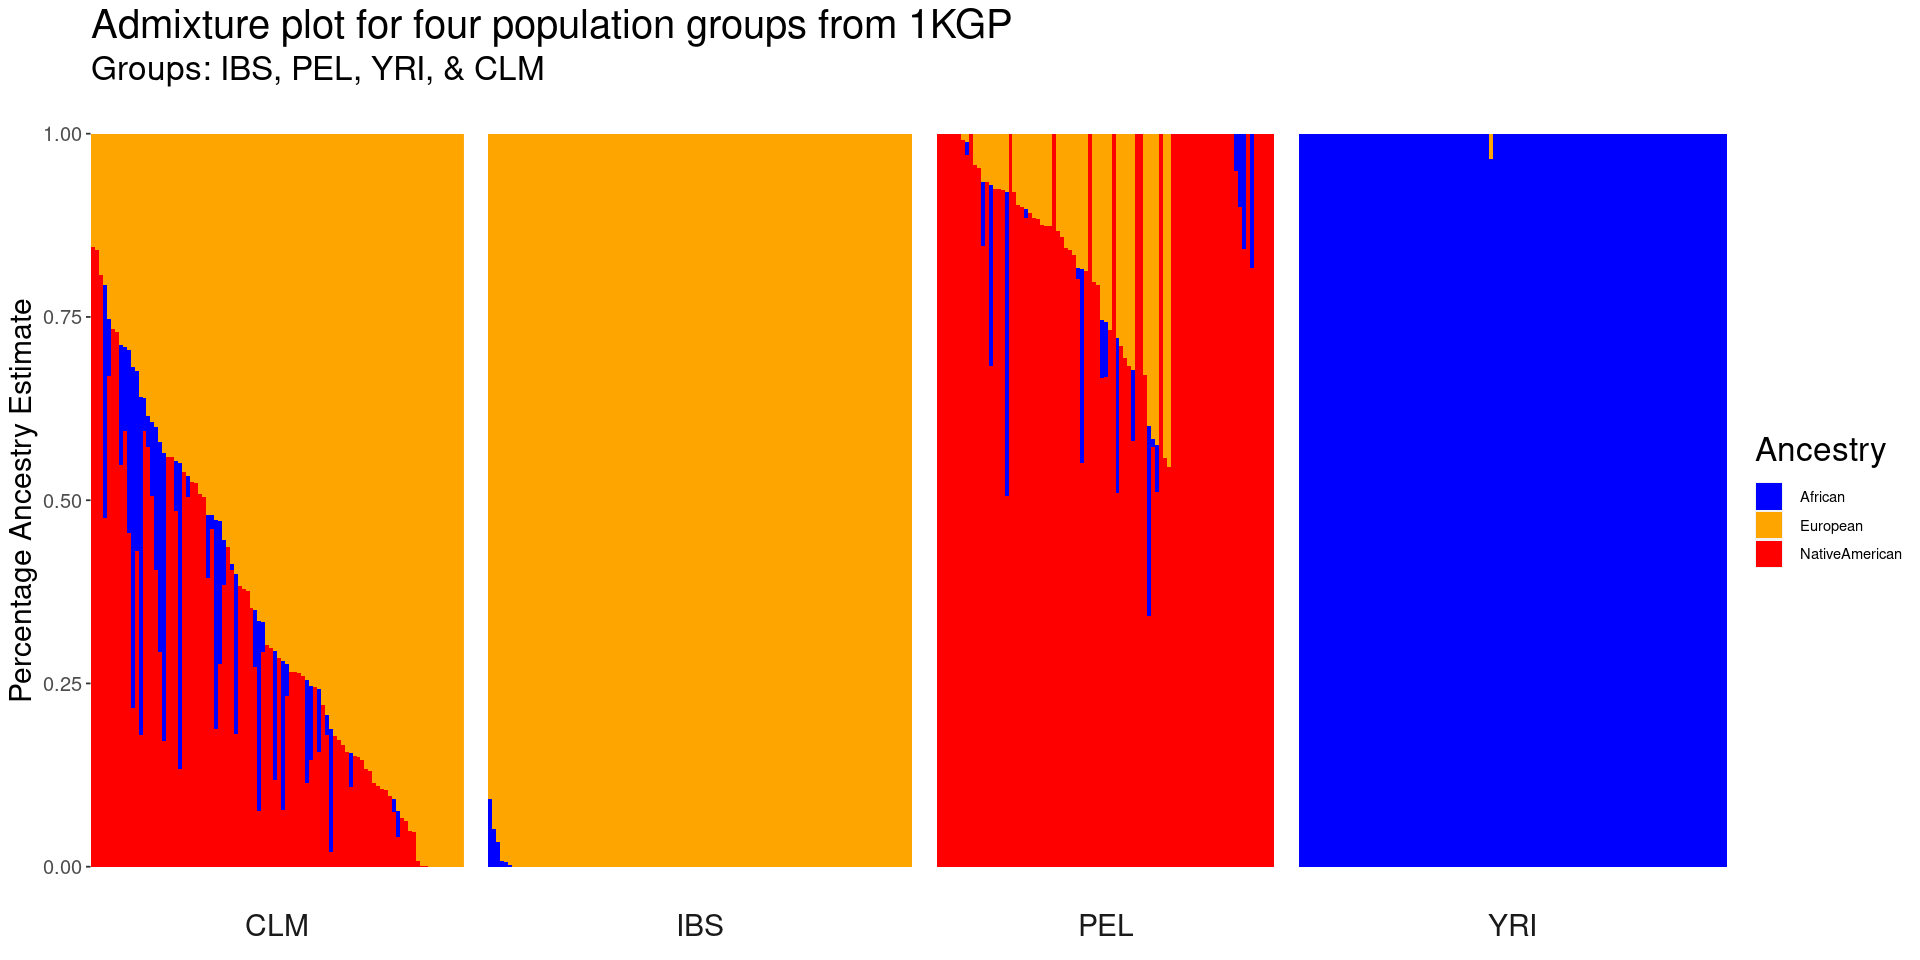

In [108]:
options(repr.plot.width=16, repr.plot.height=8)
ggplot(data=combinedAncestryEstimatesDataSortedMelt, aes(x=as.character(index), y=AncestryFraction, fill=Ancestry)) +
    geom_bar(stat="identity", width=1) + facet_grid(cols = vars(PopGroup), scales = "free", space = "free", drop = TRUE, switch="both") +
    scale_fill_manual(values=colors) + 
    labs(y="Percentage Ancestry Estimate", title = "Admixture plot for four population groups from 1KGP", subtitle = "Groups: IBS, PEL, YRI, & CLM") +
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank(), panel.spacing.x=unit(1, "lines"), 
          strip.background = element_blank(), panel.background = element_blank(), axis.text=element_text(size=12),
          axis.title=element_text(size=18), strip.text.x = element_text(size = 18), title = element_text(size = 20))


In [128]:
#write.table(combinedAncestryEstimatesData, file='data/combinedAncestryEstimatesData.tsv', quote=FALSE, sep='\t', row.names = FALSE)